In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Downloading data by calling function 

In [6]:
import os
import zipfile
import requests
from pathlib import Path


def download_data(source: str,
                  destination: str,
                  remove_source: bool=True) -> Path:

  data_path= Path("data/")
  image_path=data_path/destination

  if image_path.is_dir():
    print(f"{image_path} already exist")

  else:
  
    image_path.mkdir(parents=True, exist_ok=True)
    target_file=Path(source).name

    with open(data_path / target_file, "wb") as f:
      request= requests.get(source)
      print("Downloading..")
      f.write(request.content)

    with zipfile.ZipFile(data_path/ target_file, "r") as zip_ref:
      print("Unzipping")
      zip_ref.extractall(image_path)
      print("Done")

  if remove_source:
    os.remove(data_path / target_file)

  return image_path

In [7]:
image_path= download_data( source= "https://github.com/Fuad3004/5-Classes-of-Food-101-Dataset/raw/main/5_Classes_of_Food101_Dataset.zip",
                          destination="5-classes-of-food101"
                          )

Downloading..
Unzipping
Done


In [8]:
# !rm -rf data/destination

In [9]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from python_file import data_setup, traintest
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find python_file scripts... downloading them from GitHub.")
    !git clone https://github.com/Fuad3004/ComupterVision-food101-Dataset
    !mv ComupterVision-food101-Dataset/python_file .
    !rm -rf ComupterVision-food101-Dataset
    from python_file import data_setup, traintest

[INFO] Couldn't find torchinfo... installing it.
[INFO] Couldn't find python_file scripts... downloading them from GitHub.
Cloning into 'ComupterVision-food101-Dataset'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 18 (delta 0), reused 15 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), 9.47 KiB | 1.89 MiB/s, done.


# **DataLoader**

In [12]:
from python_file import data_setup

**Manually**

In [10]:
# Setup directories
train_dir = image_path / "train"
test_dir = image_path / "test"

# Setup ImageNet normalization levels (turns all images into similar distribution as ImageNet)
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

# Create transform pipeline manually
manual_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    normalize
])           
print(f"Manually created transforms: {manual_transforms}")

# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # use manually created transforms
    batch_size=32
)

train_dataloader, test_dataloader, class_names

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


(<torch.utils.data.dataloader.DataLoader at 0x7f4bb32159c0>,
 ['chicken_wings', 'cup_cakes', 'pizza', 'ramen', 'waffles'])

**Automatic**

In [13]:
# Setup dirs
train_dir = image_path / "train"
test_dir = image_path / "test"

# Setup pretrained weights (plenty of these available in torchvision.models)
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT

# Get transforms from weights (these are the transforms that were used to obtain the weights)
automatic_transforms = weights.transforms() 
print(f"Automatically created transforms: {automatic_transforms}")

# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=automatic_transforms, # use automatic created transforms
    batch_size=32
)

train_dataloader, test_dataloader, class_names

Automatically created transforms: ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)


(<torch.utils.data.dataloader.DataLoader at 0x7f4bb2fdf220>,
 ['chicken_wings', 'cup_cakes', 'pizza', 'ramen', 'waffles'])

#Preparing PreTrained Model

In [14]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT 
model = torchvision.models.efficientnet_b0(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 66.4MB/s]


In [17]:
import torch
from torchinfo import summary

In [19]:
summary(model=model, 
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
        )


/usr/local/lib/python3.10/dist-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/usr/local/lib/python3.10/dist-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

**Freezing**

In [20]:
for param in model.features.parameters():
    param.requires_grad = False

In [21]:
summary(model=model, 
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
        )


Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

**Update the classifier head to suit our problem**

In [22]:
# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), #randomly dropout some, and decrease the overfitting
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [23]:
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=5, bias=True)
)

#Train Model

In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [25]:
from python_file import traintest
from timeit import default_timer as timer 

start_time = timer()


results = traintest.train(model=model,
                          train_dataloader=train_dataloader,
                          test_dataloader=test_dataloader,
                          loss_fn=loss_fn,
                          optimizer=optimizer,
                          epochs=5,
                          device=device)


end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")     


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.3502 | train_acc: 0.5538 | test_loss: 0.9117 | test_acc: 0.8521
Epoch: 2 | train_loss: 0.8630 | train_acc: 0.8121 | test_loss: 0.6500 | test_acc: 0.8968
Epoch: 3 | train_loss: 0.6336 | train_acc: 0.8668 | test_loss: 0.4887 | test_acc: 0.9245
Epoch: 4 | train_loss: 0.5195 | train_acc: 0.8904 | test_loss: 0.4067 | test_acc: 0.9349
Epoch: 5 | train_loss: 0.4663 | train_acc: 0.8973 | test_loss: 0.3541 | test_acc: 0.9479
Total training time: 71.441 seconds


[INFO] Couldn't find helper_functions.py, downloading...


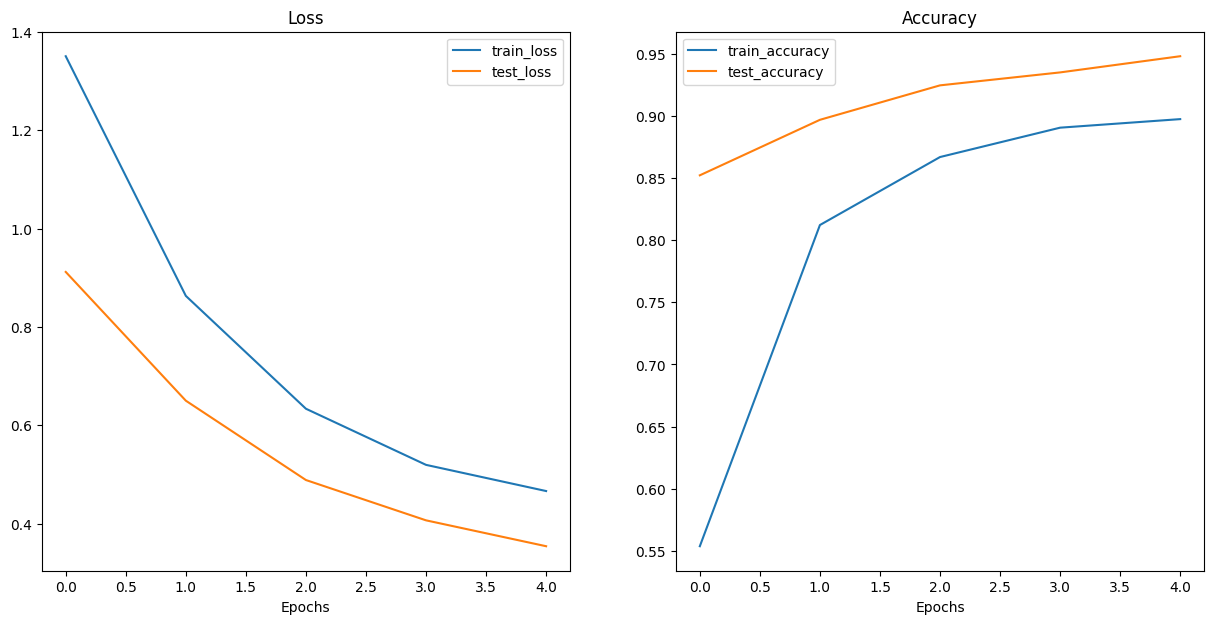

In [26]:
# Get the plot_loss_curves() function from helper_functions.py, download the file if we don't have it
try:
    from helper_functions import plot_loss_curves
except:
    print("[INFO] Couldn't find helper_functions.py, downloading...")
    with open("helper_functions.py", "wb") as f:
        import requests
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
        f.write(request.content)
    from helper_functions import plot_loss_curves

# Plot the loss curves of our model
plot_loss_curves(results)

In [27]:
from typing import List, Tuple
from PIL import Image
from torchvision import transforms

def pred_and_plot_image(model: torch.nn.Module, 
                        image_path: str, 
                        class_names: List[str] = None, 
                        image_size: Tuple[int,int]=(224,224),
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""
    img=Image.open(image_path)
    # # 1. Load in image and convert the tensor values to float32
    # target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    # # 2. Divide the image pixel values by 255 to get them between [0, 1]
    # target_image = target_image / 255. 
    
    # 3. Transform if necessary
    if transform is not None:
        image_transform  = transform
    else:
      image_transform=transforms.Compose([
                                          transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
                                          transforms.ToTensor(), # 2. Turn image values to between 0 & 1 
                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                                                               std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])
    
    # 4. Make sure the model is on the target device
    model.to(device)
    
    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        transformed_image = image_transform(img).unsqueeze(dim=0)
    
        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(transformed_image.to(device))
        
    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}")
    plt.axis(False);  
  


    # 8. Plot the image alongside the prediction and prediction probability
    # plt.imshow(img.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    # if class_names:
    #     title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    # else: 
    #     title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    # plt.title(title)
    # plt.axis(False);

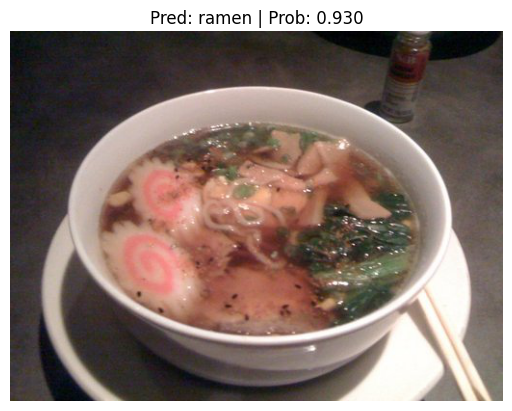

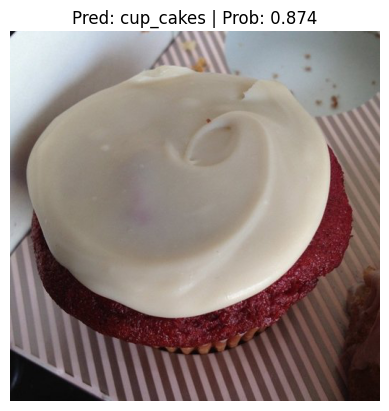

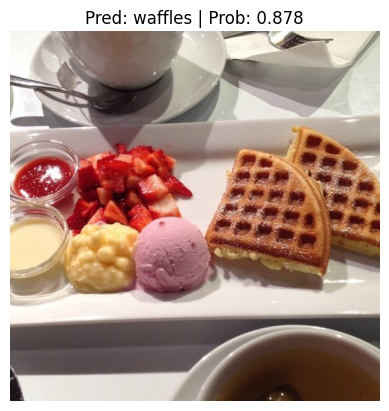

In [30]:
import random

num_img_to_plot=3

test_img_path_list= list(Path(test_dir).glob("*/*.jpg"))

test_sample=random.sample(population=test_img_path_list,
                          k=num_img_to_plot)


for image_path in test_sample:
  pred_and_plot_image(model=model,
                      image_path=image_path,
                      class_names=class_names,
                      image_size=(224,224))

In [37]:
import requests
data_path =Path("data/")
custom_img_path= data_path / "pic__test.jpeg"

if not custom_img_path.is_file():
  with open(custom_img_path,"wb") as f:
    request=requests.get("https://github.com/Fuad3004/5-Classes-of-Food-101-Dataset/raw/main/images.jpeg")
    print(f"downloading custom picture....")
    f.write(request.content)
else:
  print(f"already exist")

already exist


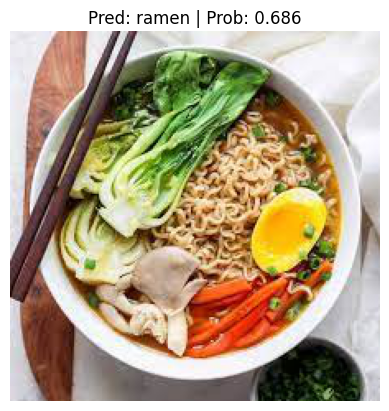

In [38]:
pred_and_plot_image(model=model,
                      image_path=custom_img_path,
                      class_names=class_names,
                      image_size=(224,224))